# Kernel PCA

In [3]:
#NumPy: numerical scientific computing 
import numpy as np

#Scikit-learn: machine learning
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA

#Matplotlib: plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

In [4]:
#Generacion datos
#np.random.seed(0)
#X, y = datasets.make_circles(n_samples=500, random_state=77, noise=0.05, factor=0.2)
X, y = datasets.make_moons(n_samples=500, random_state=77) #10 100 500

In [5]:
#Transformaciones PCA y KPCA

pca = PCA(n_components=2)
pca.fit(X) 
X_pca = pca.transform(X)

kpca = KernelPCA(n_components=2,kernel='linear',fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

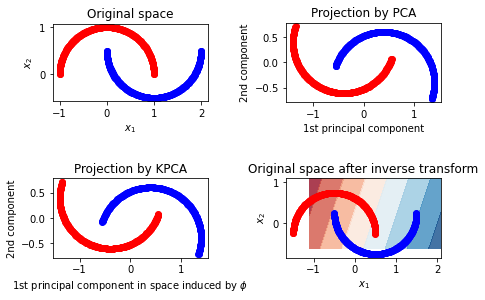

In [6]:
#Representacion datos transformados
reds = y == 0
blues = y == 1
plt.figure()

plt.subplot(2, 2, 1, aspect='equal')
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.1, 2.1, 50), np.linspace(-0.6, 1.1, 50))
#X1, X2 = np.meshgrid(np.linspace(-1.1, 1.1, 50), np.linspace(-1.1, 1.1, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
#plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
plt.contourf(X1, X2, Z_grid, cmap=plt.cm.RdBu, alpha=.8)

plt.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.5, 0.5)

plt.show()

La proyección por PCA no cambia prácticamente nada los datos, esto tiene sentido si pensamos en la forma de los datos (existe  una gran varianza en todas las direcciones). Obviamente si en la KPCA utilizamos un kernel lineal obtenemos un resultado análogo al de la PCA, por tanto vamos a intentar cuadrar los parámetros con un kernel gaussiano para poder encontrar un espacio en el que ambos conjuntos sean linealmente separables.

In [10]:
#Transformaciones PCA y KPCA

pca = PCA(n_components=2)
pca.fit(X) 
X_pca = pca.transform(X)

kpca = KernelPCA(n_components=2,gamma=10,kernel='rbf',fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

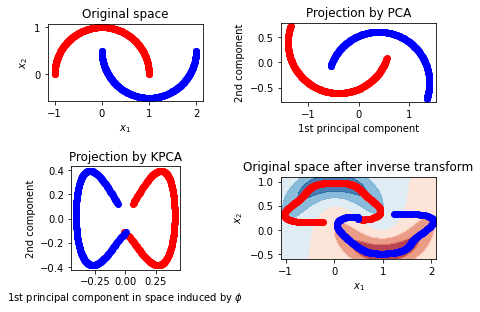

In [11]:
#Representacion datos transformados
reds = y == 0
blues = y == 1
plt.figure()

plt.subplot(2, 2, 1, aspect='equal')
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.1, 2.1, 50), np.linspace(-0.6, 1.1, 50))
#X1, X2 = np.meshgrid(np.linspace(-1.1, 1.1, 50), np.linspace(-1.1, 1.1, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
#plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
plt.contourf(X1, X2, Z_grid, cmap=plt.cm.RdBu, alpha=.8)

plt.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.5, 0.5)

plt.show()

Ahora la KPCA si consigue un resultado interesante, estamos cerca de conseguir que sean linealmente separables aunque todavía falla en uno de los vértices de los arcos.

In [12]:
#Transformaciones PCA y KPCA

pca = PCA(n_components=2)
pca.fit(X) 
X_pca = pca.transform(X)

kpca = KernelPCA(n_components=2,gamma=30,kernel='rbf',fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

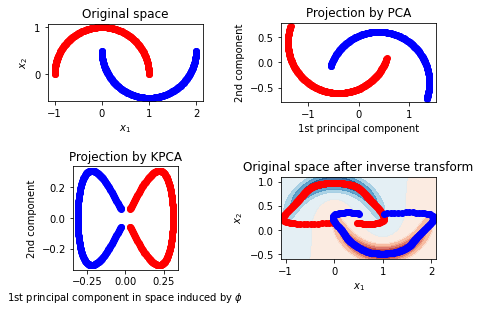

In [13]:
#Representacion datos transformados
reds = y == 0
blues = y == 1
plt.figure()

plt.subplot(2, 2, 1, aspect='equal')
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.1, 2.1, 50), np.linspace(-0.6, 1.1, 50))
#X1, X2 = np.meshgrid(np.linspace(-1.1, 1.1, 50), np.linspace(-1.1, 1.1, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
#plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
plt.contourf(X1, X2, Z_grid, cmap=plt.cm.RdBu, alpha=.8)

plt.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.5, 0.5)

plt.show()

Ahora si que hemos conseguido que sean linealmente separables ambos conjuntos (aunque con poca separación entre ellos). Al realizar la transformación inversa queda claro que las zonas críticas son precisamente los vértices de los arcos.